# Convolutional Neural Network on MNIST dataset

In this chapter we will play around the MNIST dataset (hand writing digits) and use it to implement a simple CNN model. This example utilized **"tensorflow"** and **"keras"** to be the main framework. Please notice that this example **require NVIDIA GPU** on your computer. If you have GPU intergrated please start to run the code and ignore the **Moun to google drive cell**. Otherwise, please refer to **"How to use Google Colab"** and use GoogleColab to implement this example.

In [1]:
#Mount colab to your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
import seaborn as sns

In [2]:
#Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#When call the function, the code return two pair of train and test set which is ready to use

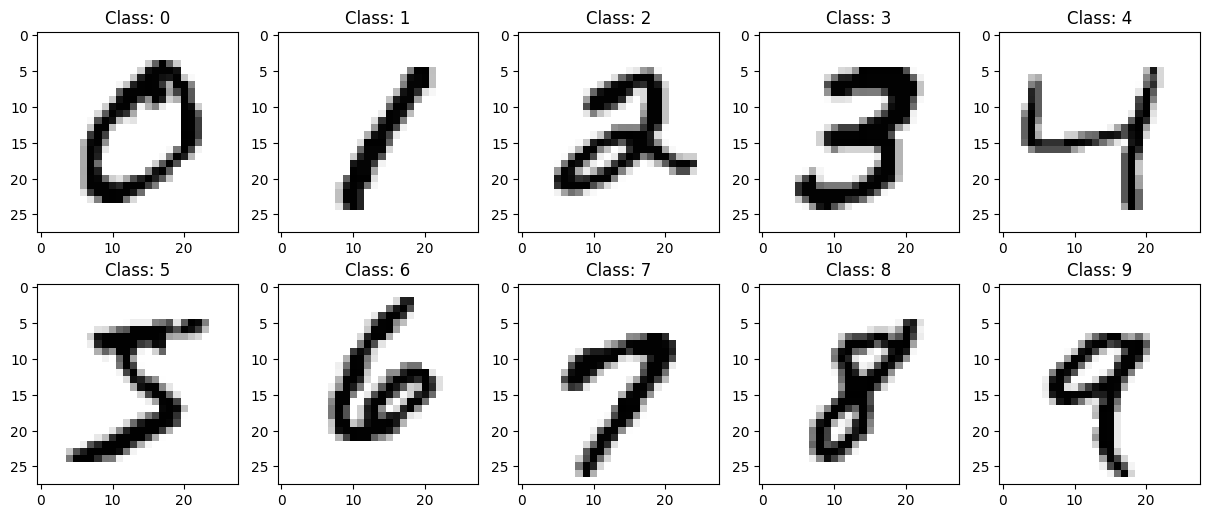

In [3]:
#Visualize data
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()
for i in range(10):
    axs[i].imshow(X_train[y_train == i][0], cmap=plt.cm.binary)
    axs[i].set_title(f'Class: {i}')
plt.show()

In [4]:
#Checking dimension
print(X_train.shape) # 60000 image will go for training each image has dimension 28x28
print(X_test.shape) #60000 label correspond to train set
print(y_train.shape) #10000 image will go for training each image has dimension 28x28
print(y_test.shape) #10000 label correspond to train set


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
#Normalize data 
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

In [6]:
X_train = np.expand_dims(X_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)

In [7]:
print(X_train[0].shape)
print(X_test[0].shape)

(28, 28, 1)
(28, 28, 1)


In [8]:
#Define model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(28, 28,1)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) # Number of class
model.summary() #Get model summary



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

In [9]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, batch_size = 256, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
235/235 [==============================] - 5s 11ms/step - loss: 0.3086 - accuracy: 0.9060 - val_loss: 2.5809 - val_accuracy: 0.1150
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0627 - accuracy: 0.9807 - val_loss: 0.8439 - val_accuracy: 0.7109
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0463 - accuracy: 0.9853 - val_loss: 0.0424 - val_accuracy: 0.9867
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0347 - accuracy: 0.9886 - val_loss: 0.0343 - val_accuracy: 0.9891
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0286 - accuracy: 0.9909 - val_loss: 0.0572 - val_accuracy: 0.9823
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0291 - val_accuracy: 0.9915
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.0319 - val_accuracy: 0.9910

In [11]:
#Evaluate model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0296 - accuracy: 0.9912


[0.029561832547187805, 0.9911999702453613]

313/313 [==============================] - 1s 2ms/step


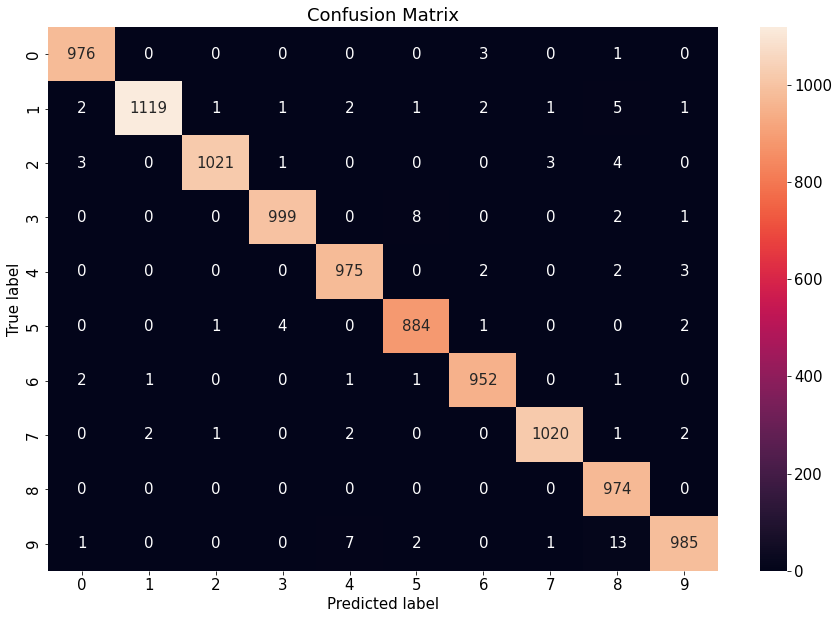

In [15]:
plt.rcParams['figure.figsize'] = (15, 10)
y_test_arg=np.argmax(y_test)
y_pred = np.argmax(model.predict(X_test),axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.rcParams.update({'font.size': 15})
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

313/313 - 1s - loss: 0.0321 - accuracy: 0.9905 - 704ms/epoch - 2ms/step


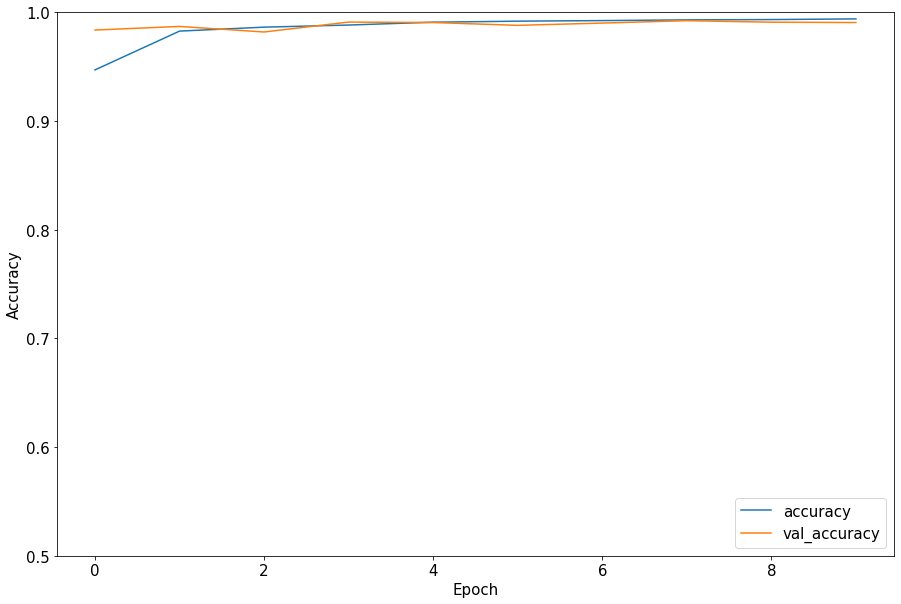

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

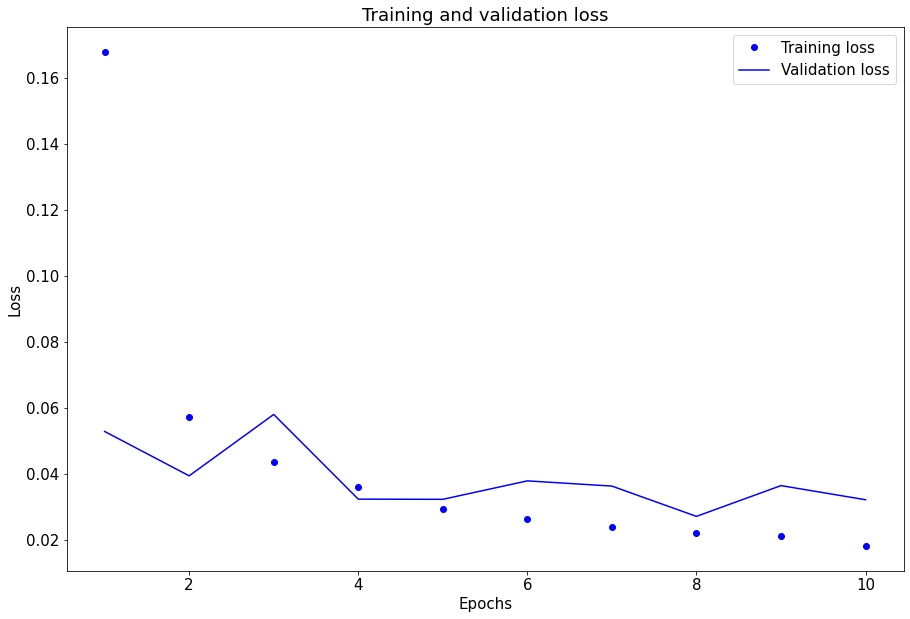

In [18]:
#Checking overfitting or underfitting
history_dict = history.history
history_dict.keys()
#plotting the training and validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

313/313 [==============================] - 1s 2ms/step


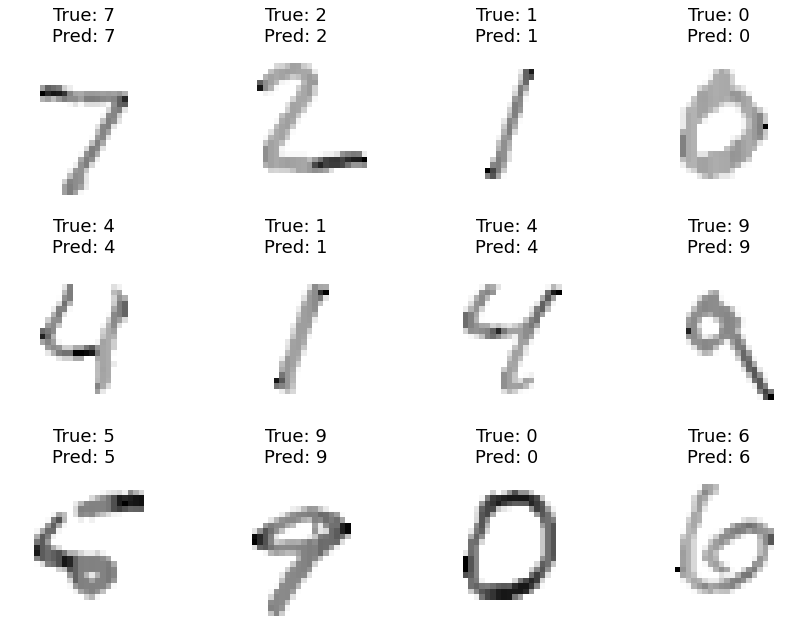

In [ ]:
# Make predictions on X_test
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Get the indices of the correctly predicted images
correct_indices = [i for i in range(len(y_pred)) if y_pred[i] == y_test[i]]

# Select the first 12 correctly predicted images
correct_indices = correct_indices[:12]

# Plot the selected images
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[correct_indices[i]].squeeze(), cmap=plt.cm.binary)
    ax.axis("off")
    ax.set_title("True: %s\nPred: %s" % (y_test[correct_indices[i]], y_pred[correct_indices[i]]))
plt.tight_layout()
plt.show()


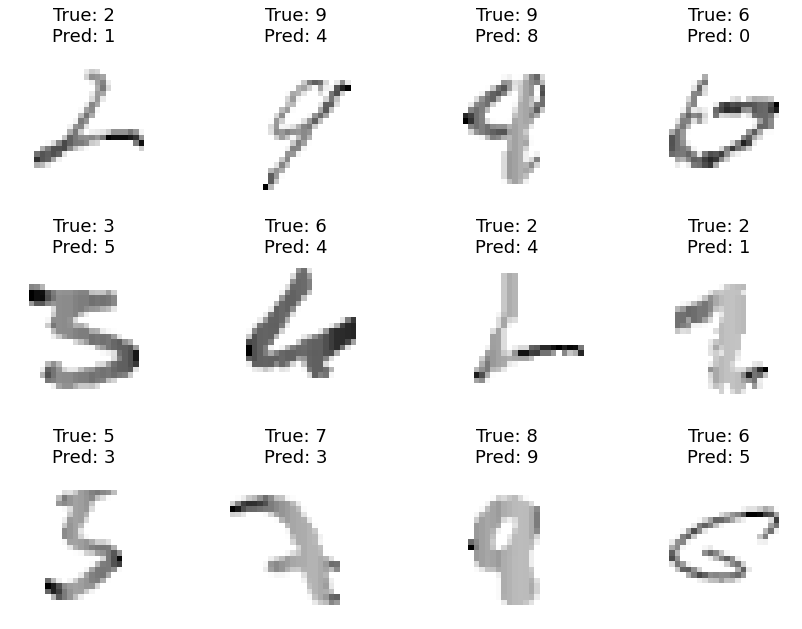

In [ ]:
# Get the indices of the incorrectly predicted images
incorrect_indices = [i for i in range(len(y_pred)) if y_pred[i] != y_test[i]]

# Select the first 12 incorrectly predicted images
incorrect_indices = incorrect_indices[:12]

# Plot the selected images
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[incorrect_indices[i]].squeeze(), cmap=plt.cm.binary)
    ax.axis("off")
    ax.set_title("True: %s\nPred: %s" % (y_test[incorrect_indices[i]], y_pred[incorrect_indices[i]]))
plt.tight_layout()
plt.show()



In [ ]:
#Total number of incorrect prediction
number_incorrect_indices = [i for i in range(len(y_pred)) if y_pred[i] != y_test[i]]
print("Number of wrong prediction:",len(number_incorrect_indices))

Number of wrong prediction: 112


In [ ]:
#Save model
model.save('Minist.h5')

In [ ]:
#Navigate directory
%cd drive/MyDrive/Val_data/

[Errno 2] No such file or directory: 'drive/MyDrive/Val_data/'
/content/drive/MyDrive/Val_data


In [ ]:
#Double check current directory
%pwd

'/content/drive/MyDrive/Val_data'

In [ ]:
#Load model
model = tf.keras.models.load_model('Mnist.h5')

1/1 [==============================] - 0s 16ms/step
Predicted result of image 0 is 0
1/1 [==============================] - 0s 16ms/step
Predicted result of image 1 is 1
1/1 [==============================] - 0s 17ms/step
Predicted result of image 2 is 2
1/1 [==============================] - 0s 14ms/step
Predicted result of image 3 is 3
1/1 [==============================] - 0s 14ms/step
Predicted result of image 4 is 4
1/1 [==============================] - 0s 17ms/step
Predicted result of image 5 is 5
1/1 [==============================] - 0s 15ms/step
Predicted result of image 6 is 5
1/1 [==============================] - 0s 16ms/step
Predicted result of image 7 is 7
1/1 [==============================] - 0s 17ms/step
Predicted result of image 8 is 8
1/1 [==============================] - 0s 17ms/step
Predicted result of image 9 is 8


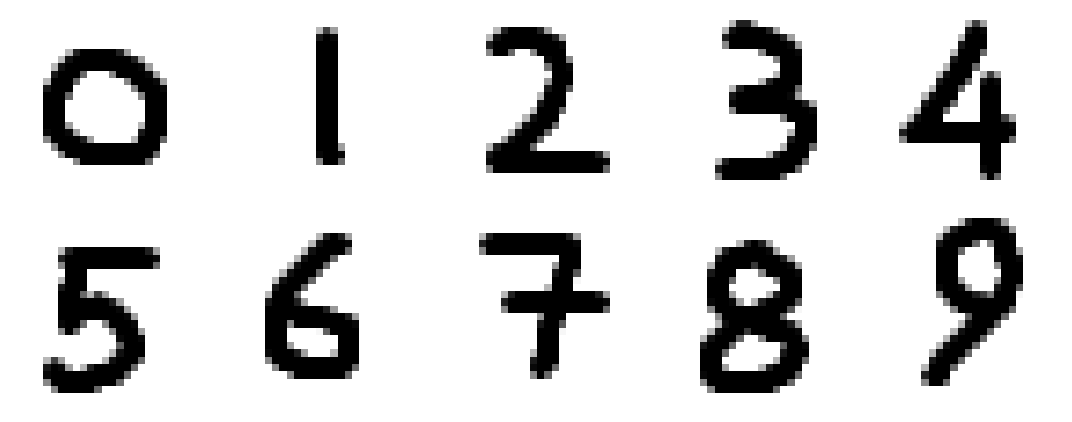

In [ ]:
#Show validation dataset, make prediction and show predicted result
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.ravel()
for i in range(10):
    img = cv2.imread("{}.png".format(i),cv2.IMREAD_GRAYSCALE)
    img = np.invert(img)
    img = np.array(img)
    img = img.reshape(1, 28, 28, 1)
    pred = model.predict(img)
    print("Predicted result of image {} is {}".format(i,np.argmax(pred)))
    axs[i].imshow(img.squeeze(),cmap=plt.cm.binary)
    axs[i].axis("off")
    plt.tight_layout()
# plt.show()
